In [99]:
import numpy as np
import pandas as pd
from scipy.stats import norm
from tqdm import tqdm
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
a = np.abs(np.random.randn(1000))
b = np.round_(np.exp(a))

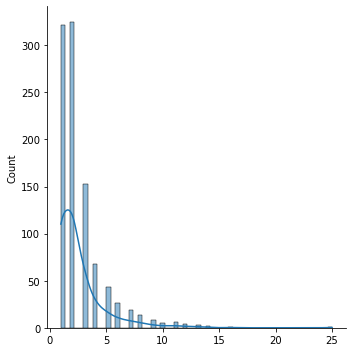

In [62]:
sns.displot(data=b, kde=True)

In [64]:
b[:100]

array([ 2.,  3.,  2.,  4.,  3.,  4.,  1.,  2.,  2.,  1.,  1.,  2.,  1.,
        4.,  1.,  2.,  1.,  1.,  3.,  2.,  1.,  2.,  2.,  1.,  2.,  1.,
       10.,  4.,  1.,  3.,  5.,  7.,  2.,  5.,  3.,  3.,  3.,  1.,  1.,
        1., 10.,  2.,  5.,  6.,  1.,  1.,  2.,  2.,  9.,  2.,  4.,  1.,
        1.,  2.,  2.,  4.,  5.,  1.,  3., 13.,  1.,  5.,  1.,  7.,  1.,
        2.,  1., 12.,  3.,  1.,  2.,  2.,  7.,  2.,  1.,  2.,  1.,  1.,
        1.,  1.,  1.,  5.,  2.,  2.,  4.,  9.,  8.,  2.,  3.,  1.,  4.,
        5.,  6.,  2.,  1.,  2.,  1.,  2.,  1.,  2.])

In [180]:
np.round(np.exp(np.abs(np.random.randn())))

3.0

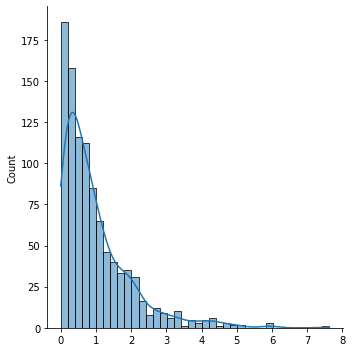

In [77]:
c = np.random.exponential(size=1000)
sns.displot(data=c, kde=True)

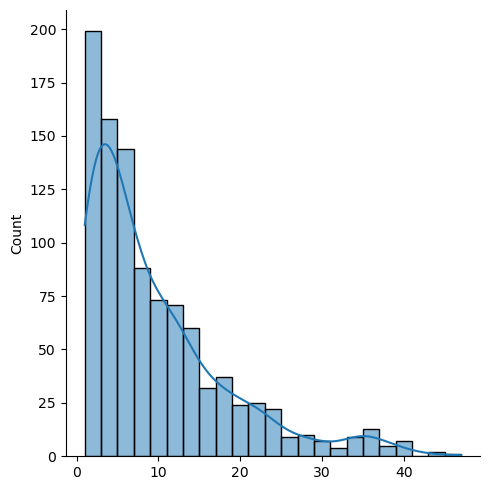

In [173]:
c = np.random.geometric(p=0.1,size=1000)
sns.displot(data=c, kde=True)

In [220]:
np.random.geometric(p=0.8)

1

# Increase or Decrease Chances

In [8]:
uniform = np.random.uniform(1,10,1000000)

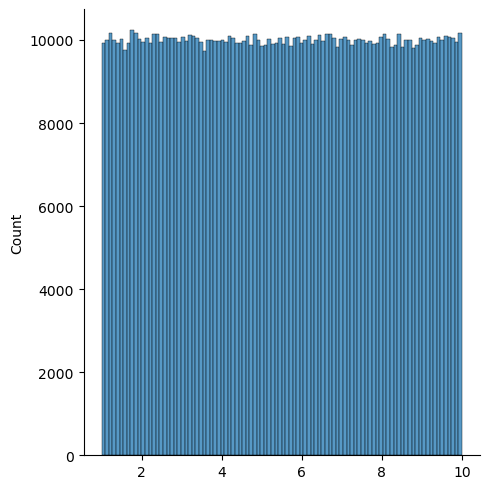

In [9]:
sns.displot(data=uniform)

In [169]:
# initialise
test = np.ones(10)

# set custom probabilities
test[8] = 0.6
test[3] = 1.5
test[2] = 0.1
test[9] = 7
print(test)

# set the thresholds
test_cum = np.cumsum(test).reshape((10,1))
print(test_cum)

# roll the dice
random_value = np.random.uniform(0,test.sum(),1)
print(random_value)

pick = np.argmax((test_cum // random_value)>0)
print(pick)

[1.  1.  0.1 1.5 1.  1.  1.  1.  0.6 7. ]
[[ 1. ]
 [ 2. ]
 [ 2.1]
 [ 3.6]
 [ 4.6]
 [ 5.6]
 [ 6.6]
 [ 7.6]
 [ 8.2]
 [15.2]]
[12.67287104]
9


In [143]:
# let's test it out en-masse

mass_test = np.random.uniform(0,test.sum(), (1,1000000))
result = test_cum // mass_test
result.shape
result_alt = np.transpose(result)
argmax_approach = np.argmax(result_alt>0, axis=1)

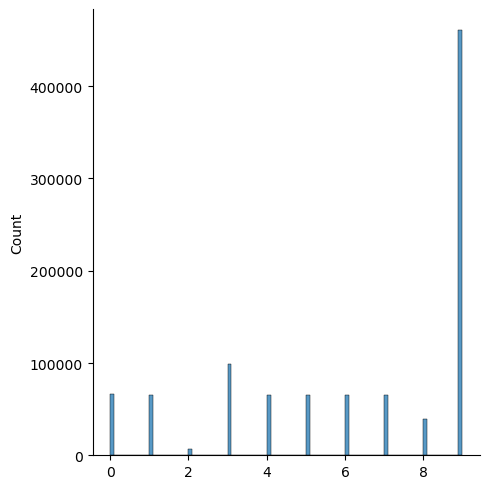

In [144]:
graph = sns.displot(data=argmax_approach)

### Determining vlo to vhi

In [497]:
np.random.geometric(p=dist_dict['hi'])

1

<Figure size 640x480 with 0 Axes>

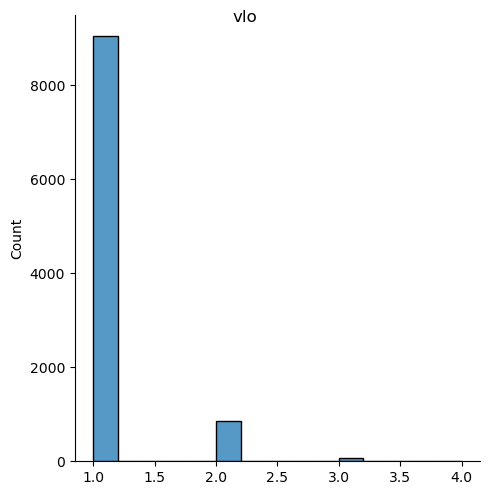

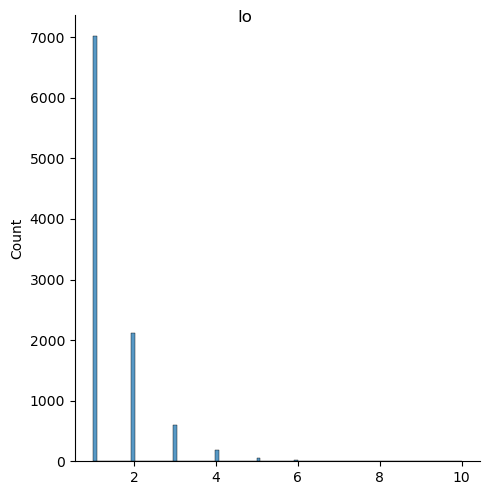

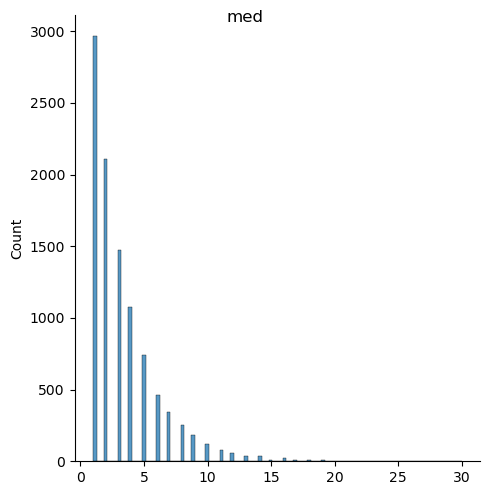

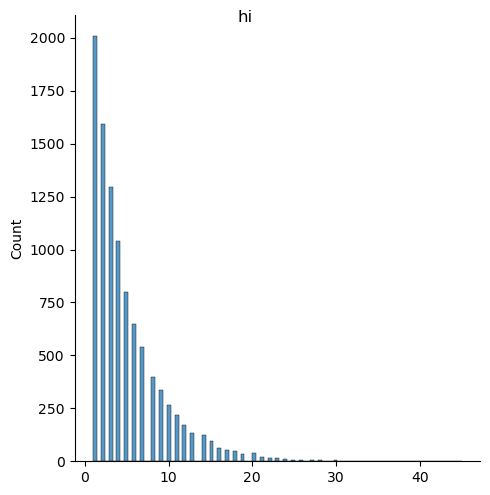

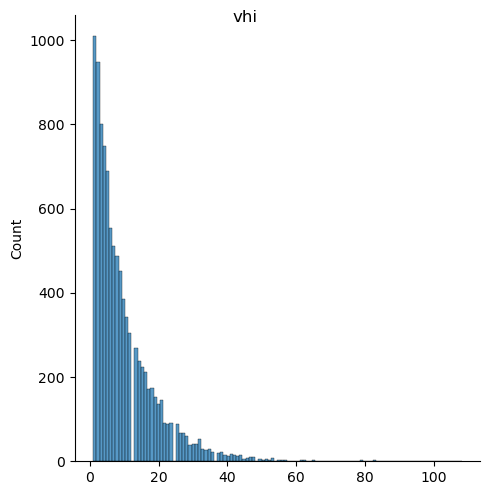

In [446]:
dist_dict = {
    'vlo': 0.9,
    'lo':  0.7,
    'med': 0.3,
    'hi':  0.2,
    'vhi': 0.1
}

for i, dist in enumerate(dist_dict):
    c = np.random.geometric(p=dist_dict[dist],size=10000)
    plt.figure(i)
    plot = sns.displot(data=c)
    plot.fig.suptitle(dist)
    

# Emergency Callout Mini-Game

In [117]:
# Fumble, 
prof_skills = [14,12,14,12,13]
combat_skills = [14,14,12,12,12]

In [95]:
rolls = []
for i in tqdm(range(1000000)):
    prof_rolls = [i + np.random.randint(1,11) for i in prof_skills]
    combat_rolls = [i + np.random.randint(1,11) for i in combat_skills]
    prof_mean = np.mean(prof_rolls)
    combat_mean = np.mean(combat_rolls)
    prof_prop = np.random.random()
    average_roll = prof_mean * prof_prop + combat_mean * (1-prof_prop)
    rolls.append(average_roll)

100%|███████████████████████████████| 1000000/1000000 [00:23<00:00, 42342.34it/s]


In [98]:
np.mean(rolls), np.std(rolls)

(18.101672152666488, 1.0553024905826527)

In [106]:
1-norm.cdf(16, np.mean(rolls), np.std(rolls))

0.9767889653123705

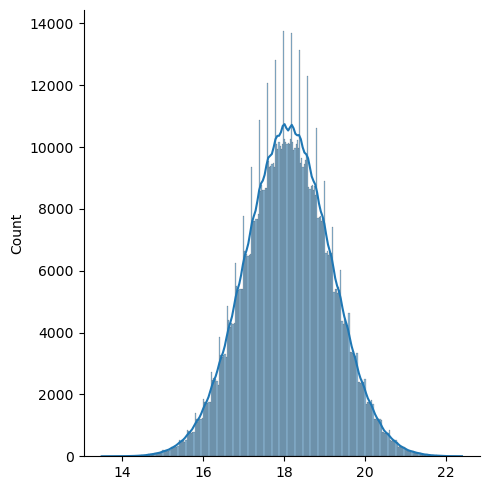

In [97]:
sns.displot(data=rolls, kde=True)

100%|███████████████████████████████| 1000000/1000000 [00:11<00:00, 85555.42it/s]


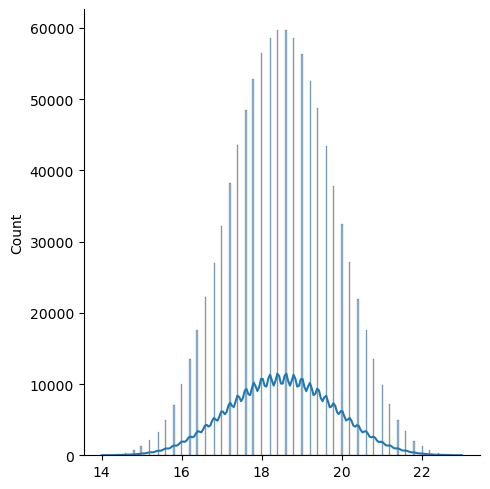

In [118]:
rolls = []
for i in tqdm(range(1000000)):
    prof_rolls = [i + np.random.randint(1,11) for i in prof_skills]
    prof_mean = np.mean(prof_rolls)
    rolls.append(prof_mean)

sns.displot(data=rolls, kde=True)

In [119]:
np.mean(rolls)

18.5000348

In [140]:
1-norm.cdf(19, np.mean(rolls), np.std(rolls))

0.34863169628512625

# Items List Random Picking

In [3]:
df = pd.read_csv("items_list.csv")

In [4]:
df.head()

,item,cost,price_category,type,subtype
0,Combat Knife,50,costly,Melee Weapon,Light Melee Weapon
1,Tomahawk,50,costly,Melee Weapon,Light Melee Weapon
2,Baseball Bat,50,costly,Melee Weapon,Medium Melee Weapon
3,Crowbar,50,costly,Melee Weapon,Medium Melee Weapon
4,Machete,50,costly,Melee Weapon,Medium Melee Weapon


In [62]:
payout = 1400
budget = payout * np.random.random()
print(budget)

price_range = {'everyday':20, 'costly':50, 'premium':100, 'expensive':500, 'very expensive':1000}

remainder = budget
payout_df = pd.DataFrame(columns=df.columns)

while remainder >= 20:
    sample = df.sample(1)
    sample = quality(sample)
    quantity = int(remainder // sample['cost'].item())
    if quantity == 0:
        continue
    remainder -= quantity * sample['cost'].item()
    samples = pd.concat([sample]*quantity)
    payout_df = pd.concat([payout_df, samples])

payout = payout - payout_df['cost'].sum()
print(payout)
payout_df

520.7287527517876
880


,item,cost,price_category,type,subtype
42,Smart Ammo,500,expensive,Ammo,NaN
88,Flashlight,20,everyday,Gear,NaN


In [20]:
sample

,item,cost,price_category,type,subtype
59,Leathers,20,everyday,Armor,NaN


In [ ]:
def quality(sample):
    if sample[~sample['type'].isin(['Melee Weapon', 'Ranged Weapon'])]:
        return sample
    current_quality = price_range.index(sample['price_category'].item())
    

In [64]:
df[df['type'].isin(['Melee Weapon', 'Ranged Weapon'])]

,item,cost,price_category,type,subtype
0,Combat Knife,50,costly,Melee Weapon,Light Melee Weapon
1,Tomahawk,50,costly,Melee Weapon,Light Melee Weapon
2,Baseball Bat,50,costly,Melee Weapon,Medium Melee Weapon
3,Crowbar,50,costly,Melee Weapon,Medium Melee Weapon
4,Machete,50,costly,Melee Weapon,Medium Melee Weapon
5,Lead Pipe,100,premium,Melee Weapon,Heavy Melee Weapon
6,Sword,100,premium,Melee Weapon,Heavy Melee Weapon
7,Spiked Bat,100,premium,Melee Weapon,Heavy Melee Weapon
8,Chainsaw,500,expensive,Melee Weapon,Very Heavy Melee Weapon
9,Sledgehammer,500,expensive,Melee Weapon,Very Heavy Melee Weapon
